In [2]:
#for manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# for interactivity
from ipywidgets import interact


In [3]:
# Lets read the dataset
data=pd.read_csv('data.csv')

In [4]:

# Lets check the shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [5]:
# Lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
 # lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# lets check the crops present in this Dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
#Lets check the details of all the crops
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
data.groupby(['label']).mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [10]:
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(data.groupby(['label']).agg({conditions : ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
#Lets make this function more Intuitive
@interact
def sumary(condition=['N','P','K','temperature','humidity','ph','rainfall']):
    print("crops which need more than average",condition,'\n')
    print(data[data[condition]>data[condition].mean()]['label'].unique())
    print(".............................................")
    print("crops which need less than avg",condition,'\n')
    print(data[data[condition]<data[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

In [12]:
print("Summer Crop")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("winter Crop")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("Rainy Crop")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crop
['rice' 'papaya' 'coconut']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

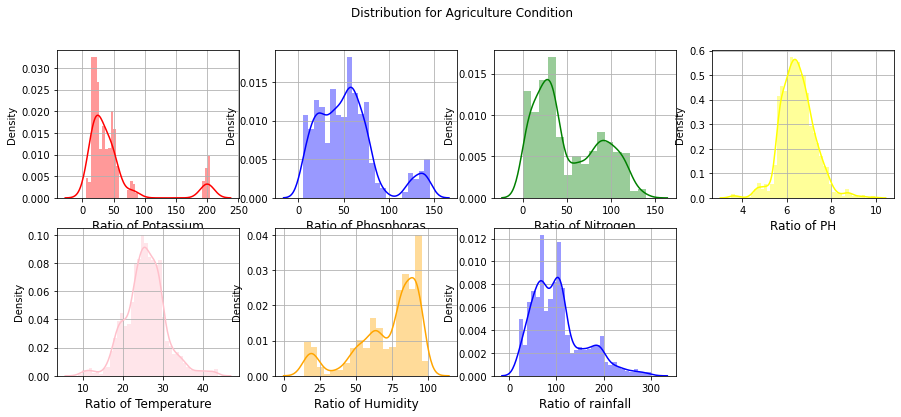

In [19]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(data['K'],color='red')
plt.xlabel('Ratio of Potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='blue')
plt.xlabel('Ratio of Phosphoras',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['N'],color='green')
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['ph'],color='yellow')
plt.xlabel("Ratio of PH",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['temperature'],color='pink')
plt.xlabel('Ratio of Temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='orange')
plt.xlabel('Ratio of Humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='blue')
plt.xlabel("Ratio of rainfall",fontsize=12)
plt.grid()

plt.suptitle("Distribution for Agriculture Condition")
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
#Remove the labelcolumns
x=data.drop(['label'],axis=1)

#Selecting all the values of the data
x=x.values

#Checking the shape
print(x.shape)

(2200, 7)


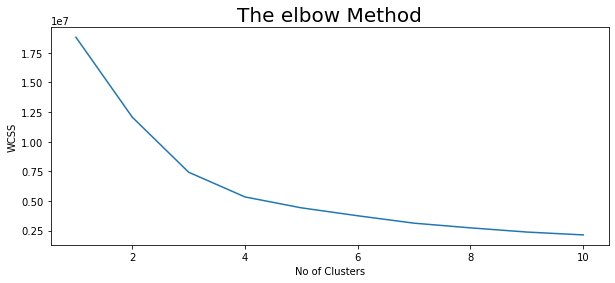

In [56]:
#Lets determine the Optimum Number of Clusters within the Dataset
plt.rcParams['figure.figsize']=(10,4)
wcss=[ ]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
#Lets implement the K Means algorithm to perform Clustering analysis
km=KMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=10,random_state=0)
y_means=km.fit_predict(x)


In [58]:
#Lets find out the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis=1)
z = z.rename(columns = {0: 'cluster'})

In [48]:
#Lets check the Clusters of each Crops
print("Crops in first cluster")
print(z[z['cluster']==0]['label'].unique())
print("Crops in second cluster")
print(z[z['cluster']==1]['label'].unique())
print("Crops in third cluster")
print(z[z['cluster']==2]['label'].unique())
print("Crops in fourth cluster")
print(z[z['cluster']==3]['label'].unique())

Crops in first cluster
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in second cluster
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in third cluster
['grapes' 'apple']
Crops in fourth cluster
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [59]:
#Lets split the Dataset for Predictive Modelling

y=data['label']
X=data.drop(['label'],axis=1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [60]:
#Lets create training and testing sets for validation of results
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print("The shape of X_train:",X_train.shape)
print("The shape of X_test:",X_test.shape)
print("The shape of y_train:",y_train.shape)
print("The shape of y_test:",y_test.shape)


The shape of X_train: (1760, 7)
The shape of X_test: (440, 7)
The shape of y_train: (1760,)
The shape of y_test: (440,)


In [63]:
#Lets create a Predictive Model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


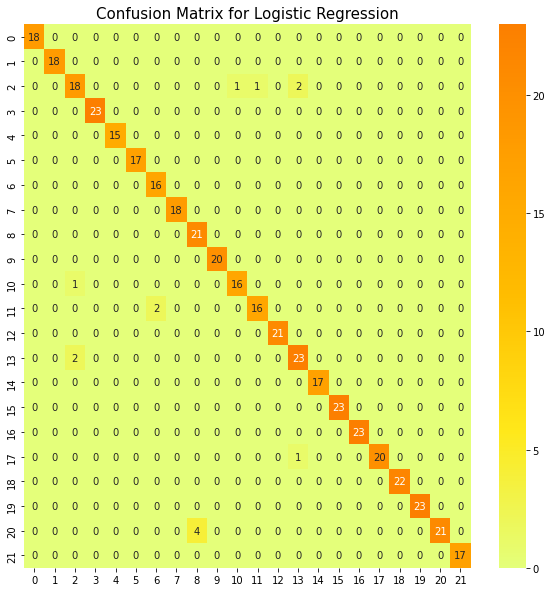

In [65]:
#Lets evaluate the model performance
from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression',fontsize=15)
plt.show()

In [67]:
#Lets print the Classification Report also
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [68]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Suggested Crop for Given Climatic Condition is :",prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
